In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import scipy.stats as st
import numpy as np


In [2]:
data_df = pd.read_csv('Resources/Crime_Data_from_2020_to_Present.csv')

main_df = data_df[['DR_NO', 'DATE OCC', 
                   'TIME OCC', 'Vict Age', 
                   'Vict Sex','Vict Descent',
                  'LAT', 'LON']]
main_df.count()

DR_NO           757141
DATE OCC        757141
TIME OCC        757141
Vict Age        757141
Vict Sex        658230
Vict Descent    658224
LAT             757141
LON             757141
dtype: int64

In [3]:
# disclaimer for dropping missing age data
cleaning_df = main_df.set_index('DR_NO')
cleaning_df = cleaning_df.loc[(cleaning_df['Vict Age'] > 0) & 
                              (cleaning_df['Vict Sex'] != "H") &
                              (cleaning_df['Vict Descent'] != "-")]                              
cleaning_df = cleaning_df.reset_index()

cleaning_df = cleaning_df.dropna(how='any')


In [12]:
final_df = cleaning_df.rename(columns={'DR_NO': 'File Number',
                                      'DATE OCC': 'Date Occurred',
                                      'TIME OCC': 'Time Occurred',
                                      'LAT': 'Latitude',
                                      'LON': 'Longitude'})
#final_df = final_df.set_index('File Number')
final_df.head()

File Number      572106
Date Occurred    572106
Time Occurred    572106
Vict Age         572106
Vict Sex         572106
Vict Descent     572106
Latitude         572106
Longitude        572106
dtype: int64


In [14]:
# Calculating measures of central tendancy

vict_ages = final_df['Vict Age']

mean_age = np.mean(vict_ages)
print (mean_age)

median_age = np.median(vict_ages)
print (median_age)

var_age = np.var(vict_ages, ddof = 0)
print(f"The population variance using the NumPy module is {var_age}")

stdev_age = np.std(vict_ages, ddof = 0)
print(f"The population standard deviation using the NumPy module is {stdev_age}")

# Normality test on the Victims age DataFrame.
print(st.normaltest(vict_ages.sample(572106)))


39.575533205385014
37.0
The population variance using the NumPy module is 242.3330440225637
The population standard deviation using the NumPy module is 15.56704994604192
NormaltestResult(statistic=29709.664688132, pvalue=0.0)


The correlation between both factors is -0.41
There is a weak negative correlation between the number of victims and their age


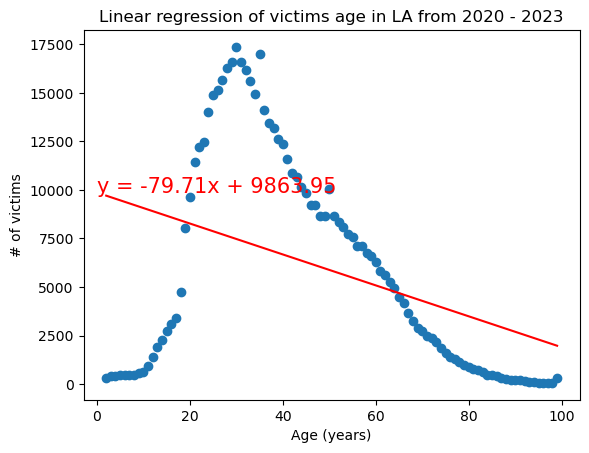

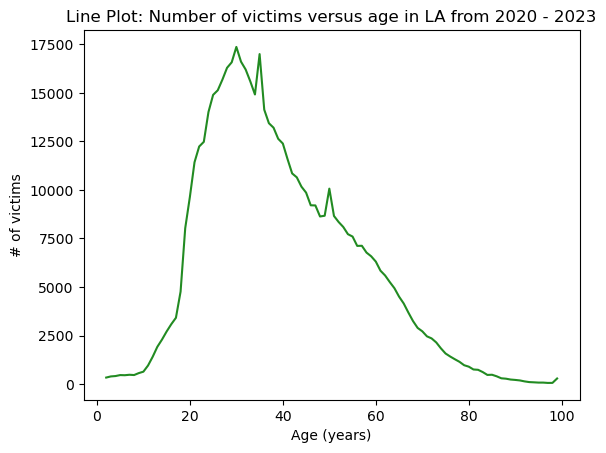

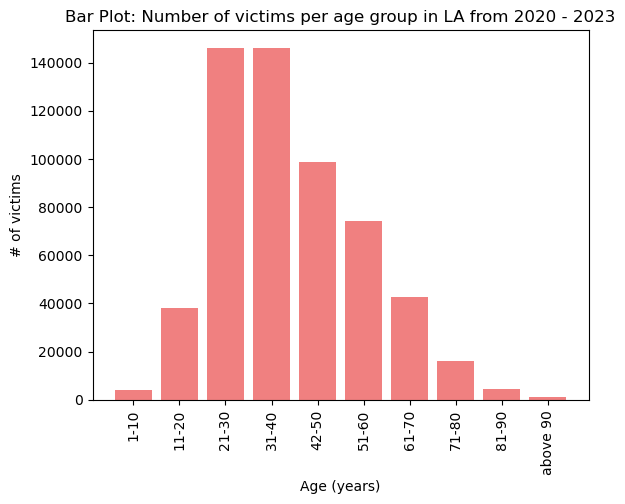

In [196]:
# Analysis for Victim Age

# Counting number of Victims by Age
age_df = final_df.groupby(['Vict Age']).count()

# Scatter Plot
vict_age = age_df.index.values
vict_count = age_df.values[:,0]

#Scatter plot (There is no correlation between the number of victims in LA and their age)

correlation = st.pearsonr(vict_age, vict_count)
print (f"The correlation between both factors is {round(correlation[0],2)}")
print ("There is a weak negative correlation between the number of victims and their age")

# Performing linear regression on the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(vict_age, vict_count)
regress_values = vict_age * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(vict_age, vict_count)
plt.plot(vict_age, regress_values, "r-")
plt.annotate(line_eq,(0, 9864), fontsize = 15, color="red")
plt.xlabel("Age (years)")
plt.ylabel("# of victims")
plt.title("Linear regression of victims age in LA from 2020 - 2023")

plt.show()


#Line plot
plt.plot(x_axis, y_axis, color="forestgreen")
plt.xlabel("Age (years)")
plt.ylabel("# of victims")
plt.title("Line Plot: Number of victims versus age in LA from 2020 - 2023")
plt.show()


# Bar plot
# Bins that hold data
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 

# Labels for bins
group_label = ["1-10", "11-20", "21-30", "31-40", "42-50", "51-60", "61-70", "71-80", "81-90", "above 90"]

# Duplicating the main dataframe to group it by age
final_df2 = final_df
final_df2["Age group"] = pd.cut(final_df2['Vict Age'], bins, labels=group_label)
final_df2

age_count_df2 = final_df2.groupby(['Age group']).count()

x = age_count_df2.index.values
y = age_count_df2.values[:,0]

#Bar
plt.bar(x, y, align="center", color='lightcoral')
plt.xticks(rotation="vertical")
plt.xlabel("Age (years)")
plt.ylabel("# of victims")
plt.title("Bar Plot: Number of victims per age group in LA from 2020 - 2023")
plt.show()


          File Number  Date Occurred  Time Occurred  Vict Age  Vict Descent  \
Vict Sex                                                                      
F              276665         276665         276665    276665        276665   
H                  85             85             85        85            85   
M              288599         288599         288599    288599        288599   
X                6843           6843           6843      6843          6843   

          Latitude  Longitude  
Vict Sex                       
F           276665     276665  
H               85         85  
M           288599     288599  
X             6843       6843  


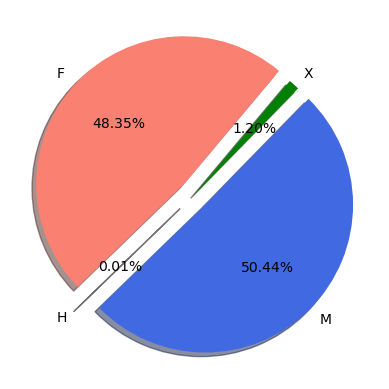

In [37]:
# Analysis for Victim Sex

# Grouping number of Victims by Sex
sex_df = final_df.groupby(['Vict Sex']).count()
print (sex_df)

# Plotting pie chart to represent Victims by Sex
vict_sex = sex_df.index.values
vict_num = sex_df.values[:,0]
explode = [0.1, 0.1, 0.1, 0]
colors = ["salmon", "black", "royalblue", "green"]

plt.pie(vict_num, labels = vict_sex, explode = explode, colors = colors, 
        autopct="%1.2f%%", shadow = True, startangle = 50)
plt.show()